In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
with open("index_rune", "r") as fp:
    idx = json.load(fp)
with open("impact_categories", "r") as fp:
    impact_category = json.load(fp)


In [3]:
ic_lst = []
for ic in impact_category:
    str_temp = '('
    for icc in ic:
        if icc != ic[-1]:
            str_temp += f'{icc}, '
        else:
            str_temp += f'{icc})'
        # print(icc)
    ic_lst.append(str_temp)
    # print(str_temp)



In [4]:
file_name_sub = r'Results\Ananas sub - CONSQ.xlsx'
df = pd.read_excel(file_name_sub)
# Convert JSON strings back to lists for all columns
df = df.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)
df = df.set_axis(idx)
df.columns = ic_lst
df

C:\Users\ruw\AppData\Local\Temp\4\ipykernel_11072\3576165090.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: json.loads(x) if isinstance(x, str) and x.startswith('[') else x)


,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
Steel cylinder - sc 1,"[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),...","[['Compresser opration 50L' (unit, GLO, None),..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 227....","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 1.33...","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]","[['Use phase basecase' (unit, GLO, None), 0.0]]"
EoL 50L cylinder - FU

In [5]:
df1 = df.copy()
for index, row in df1.iterrows():
    for col in df1.columns:
        temp = 0
        temp_use_el = None
        temp_use = None
        temp_N2O = None
        new_row_col = []
        for proc in row[col]:
            if 'transport' in proc[0]:
                temp += proc[1]
            elif 'use' in index.lower():
                if 'use' in proc[0].lower():
                    temp_use = proc[1]
                if 'electricity' in proc[0]:
                    temp_use_el = proc[1]
                    new_row_col.append(proc)
                if temp_use is not None and temp_use_el is not None:
                    temp_N2O = temp_use - temp_use_el
            else:
                new_row_col.append(proc)
        if temp != 0:
            new_row_col.append(['transport', temp])
            # print(f'{index} : use for {col} = {temp_N2O}')
            row[col] = new_row_col
            
        if temp_N2O != None:
                if temp_N2O < 0:
                    new_row_col.append(['nitrous oxided emissions', 0])
                    # print(f'{index} : use for {col} = {temp_N2O}')
                    row[col] = new_row_col
                else:
                    new_row_col.append(['nitrous oxided emissions', 0])
                    # print(f'{index} : use for {col} = {temp_N2O}')
                    row[col] = new_row_col
                
        elif 'basecase' in proc[0]:
            new_row_col.append(['nitrous oxided emissions', 0])
            row[col] = new_row_col


In [6]:
for index, row in df1.iterrows():
    for col in df1.columns:
        new_row_col = []
        for proc in row[col]:
            temp = proc[0]
            if '(unit, GLO, None)' in temp:
                proc[0] = temp.replace(' (unit, GLO, None)','')
                print(proc[0])
            elif '(kilogram, GLO, None)' in temp:
                proc[0] = temp.replace(' (kilogram, GLO, None)','')
                print(proc[0])
            elif 'printed wiring board' in temp:
                proc[0] = 'PCB'
                print(proc[0])

'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'Hydrastic testing 50L'
'Compresser opration 50L'
'Steel cylinder prod.'
'H

In [7]:
df1

,"(EF v3.1 EN15804, acidification, accumulated exceedance (AE))","(EF v3.1 EN15804, climate change, global warming potential (GWP100))","(EF v3.1 EN15804, ecotoxicity: freshwater, comparative toxic unit for ecosystems (CTUe))","(EF v3.1 EN15804, energy resources: non-renewable, abiotic depletion potential (ADP): fossil fuels)","(EF v3.1 EN15804, eutrophication: freshwater, fraction of nutrients reaching freshwater end compartment (P))","(EF v3.1 EN15804, eutrophication: marine, fraction of nutrients reaching marine end compartment (N))","(EF v3.1 EN15804, eutrophication: terrestrial, accumulated exceedance (AE))","(EF v3.1 EN15804, human toxicity: carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, human toxicity: non-carcinogenic, comparative toxic unit for human (CTUh))","(EF v3.1 EN15804, ionising radiation: human health, human exposure efficiency relative to u235)","(EF v3.1 EN15804, land use, soil quality index)","(EF v3.1 EN15804, material resources: metals/minerals, abiotic depletion potential (ADP): elements (ultimate reserves))","(EF v3.1 EN15804, ozone depletion, ozone depletion potential (ODP))","(EF v3.1 EN15804, particulate matter formation, impact on human health)","(EF v3.1 EN15804, photochemical oxidant formation: human health, tropospheric ozone concentration increase)","(EF v3.1 EN15804, water use, user deprivation potential (deprivation-weighted water consumption))"
Steel cylinder - sc 1,"[['Compresser opration 50L', 1.117628077122077...","[['Compresser opration 50L', 1.650602637633134...","[['Compresser opration 50L', 5.709188492838599...","[['Compresser opration 50L', 0.000309921222543...","[['Compresser opration 50L', 1.137631172860258...","[['Compresser opration 50L', 1.690958326088436...","[['Compresser opration 50L', 1.80731103446373e...","[['Compresser opration 50L', 4.978738678069889...","[['Compresser opration 50L', 9.23000990122216e...","[['Compresser opration 50L', 4.974843212024133...","[['Compresser opration 50L', 0.000353450783539...","[['Compresser opration 50L', 1.477096335514707...","[['Compresser opration 50L', 5.46795457621353e...","[['Compresser opration 50L', 6.219819895879126...","[['Compresser opration 50L', 6.410978177017208...","[['Compresser opration 50L', 5.304401344811386..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N...","[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]","[[nitrous oxided emissions, 0]]"
EoL 50L cylinder - FU - sc 1,"[['Cylinder cleaning 50L', 0.00013098402205311...","[['Cylinder cleaning 50L', 0.02667376660028759...","[['Cylinder cleaning 50L', 0.1371946158645319]...","[['Cylinder cleaning 50L', 0.5061069437938703]...","[['Cylinder cleaning 50L', 1.47398297564674

In [8]:
df_GWP = df1['(EF v3.1 EN15804, climate change, global warming potential (GWP100))']
df_GWP = df_GWP.to_frame()
df_GWP

,"(EF v3.1 EN15804, climate change, global warming potential (GWP100))"
Steel cylinder - sc 1,"[['Compresser opration 50L', 1.650602637633134..."
nitrous oxide production - sc 1,"[['nitrous oxide production' (kilogram, RER, N..."
Use phase basecase - sc 1,"[[nitrous oxided emissions, 0]]"
EoL 50L cylinder - FU - sc 1,"[['Cylinder cleaning 50L', 0.02667376660028759..."
CDU updated - sc 2,"[['Electronics', 0.03740152231968872], ['injec..."
Steel cylinder - sc 2,"[['Compresser opration 50L', 1.650602637633134..."
nitrous oxide production - sc 2,"[['nitrous oxide production' (kilogram, RER, N..."
Use phase CDU - sc 2,"[['market for electricity, low voltage' (kilow..."
EoL CDU - sc 2,"[[PCB, -0.00027980006204120277], ['treatment o..."
EoL 50L cylinder - FU - sc 2,"[['Cylinder cleaning 50L', 0.02667376660028759..."


In [9]:
for sc in range(1,4):
    print(f'sc. {sc}')
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    # print(index)
                    if 'use' in index.lower():
                        print(f'Use phase : {index}, row {proc}')
                    elif 'eol' in index.lower():
                        print(f'EoL : {index}, row {proc}')
                    else:
                        print(f'RM + prod. : {index}, row {proc}')

sc. 1
RM + prod. : Steel cylinder - sc 1, row ["'Compresser opration 50L'", 1.6506026376331343e-05]
RM + prod. : Steel cylinder - sc 1, row ["'Steel cylinder prod.'", 0.004965675918395517]
RM + prod. : Steel cylinder - sc 1, row ["'Hydrastic testing 50L'", 0.0002986988027667966]
RM + prod. : Steel cylinder - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 0.0]
RM + prod. : Steel cylinder - sc 1, row ['transport', 0.00017534877155276442]
RM + prod. : nitrous oxide production - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 2.405968748621886]
Use phase : Use phase basecase - sc 1, row ['nitrous oxided emissions', 0]
EoL : EoL 50L cylinder - FU - sc 1, row ["'Cylinder cleaning 50L'", 0.02667376660028759]
EoL : EoL 50L cylinder - FU - sc 1, row ["'nitrous oxide production' (kilogram, RER, None)", 0.27757829408186957]
EoL : EoL 50L cylinder - FU - sc 1, row ["'Cylinder maintenance 50L'", 0.008783854484338664]
EoL : EoL 50L cylinder - FU - sc 1, row ["'Hydrasti

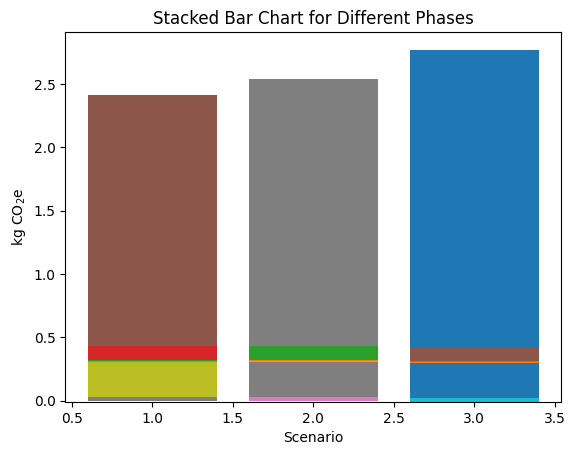

In [13]:

# Initialize dictionaries to store the values
rm_prod = {1: [], 2: [], 3: []}
use_phase = {1: [], 2: [], 3: []}
eol_phase = {1: [], 2: [], 3: []}

leg_lst = []
# Iterate through the DataFrame and categorize the values
for sc in range(1, 4):
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    if 'use' in index.lower():
                        use_phase[sc].append(proc[1])
                    elif 'eol' in index.lower():
                        eol_phase[sc].append(proc[1])
                    else:
                        rm_prod[sc].append(proc[1])
                    leg_lst.append(proc[0])
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'RM + Prod.': [sum(rm_prod[sc]) for sc in range(1, 4)],
    'Use': [sum(use_phase[sc]) for sc in range(1, 4)],
    'EoL': [sum(eol_phase[sc]) for sc in range(1, 4)]
})

# Plot the stacked bar chart
fig, ax = plt.subplots()

# Plot each phase separately
for sc in range(1, 4):
    bottom = 0
    for value in rm_prod[sc]:
        ax.bar(sc, value, bottom=bottom, label='RM + Prod.' if bottom == 0 else "")
        bottom += value
    bottom = 0
    for value in use_phase[sc]:
        ax.bar(sc, value, bottom=bottom, label='Use' if bottom == 0 else "")
        bottom += value
    bottom = 0
    for value in eol_phase[sc]:
        ax.bar(sc, value, bottom=bottom, label='EoL' if bottom == 0 else "")
        bottom += value

ax.set_xlabel('Scenario')
ax.set_ylabel('kg CO$_2$e')
ax.set_title('Stacked Bar Chart for Different Phases')
# ax.legend(leg_lst,title='Phases')
plt.show()

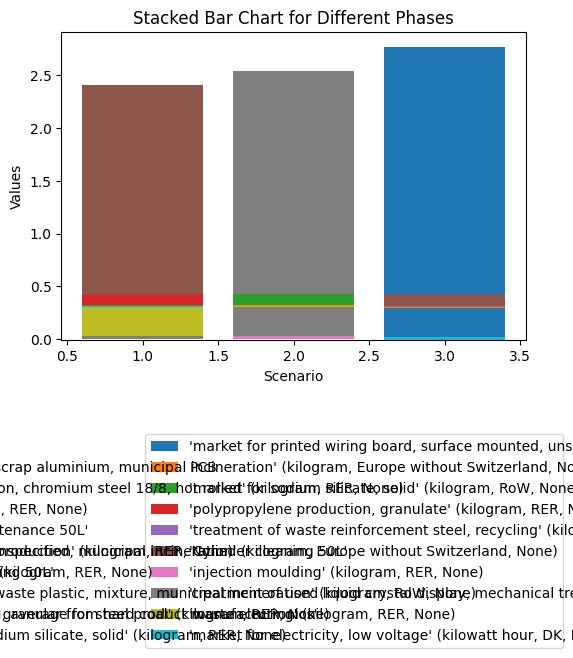

In [20]:
# Initialize dictionaries to store the values
rm_prod = {1: [], 2: [], 3: []}
use_phase = {1: [], 2: [], 3: []}
eol_phase = {1: [], 2: [], 3: []}

# Use a set to store unique legends
unique_legends = set()

# Iterate through the DataFrame and categorize the values
for sc in range(1, 4):
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    if 'use' in index.lower():
                        use_phase[sc].append(proc[1])
                    elif 'eol' in index.lower():
                        eol_phase[sc].append(proc[1])
                    else:
                        rm_prod[sc].append(proc[1])
                    unique_legends.add(proc[0])

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'RM + Prod.': [sum(rm_prod[sc]) for sc in range(1, 4)],
    'Use': [sum(use_phase[sc]) for sc in range(1, 4)],
    'EoL': [sum(eol_phase[sc]) for sc in range(1, 4)]
})

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each phase separately
for sc in range(1, 4):
    bottom = 0
    for value in rm_prod[sc]:
        ax.bar(sc, value, bottom=bottom, label='RM + Prod.' if bottom == 0 else "")
        bottom += value
    bottom = 0
    for value in use_phase[sc]:
        ax.bar(sc, value, bottom=bottom, label='Use' if bottom == 0 else "")
        bottom += value
    bottom = 0
    for value in eol_phase[sc]:
        ax.bar(sc, value, bottom=bottom, label='EoL' if bottom == 0 else "")
        bottom += value

ax.set_xlabel('Scenario')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Chart for Different Phases')
ax.legend(list(unique_legends), bbox_to_anchor=(0.18, -1, 0.9, 1), loc="lower left",
            mode="expand", borderaxespad=0,  ncol=3)
plt.show()

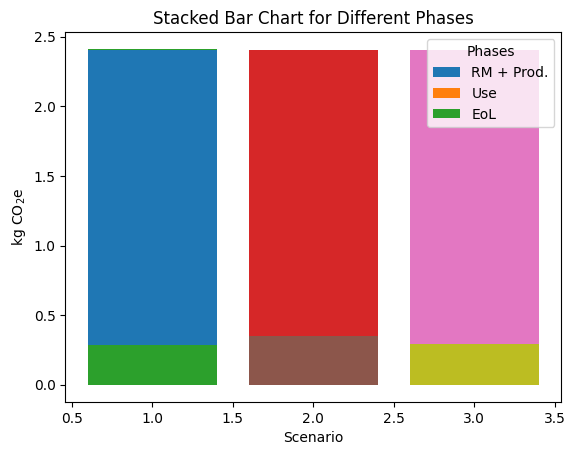

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionaries to store the values
rm_prod = {1: [], 2: [], 3: []}
use_phase = {1: [], 2: [], 3: []}
eol_phase = {1: [], 2: [], 3: []}

leg_lst = []
# Iterate through the DataFrame and categorize the values
for sc in range(1, 4):
    for index, row in df_GWP.iterrows():
        for col in df_GWP.columns:
            for proc in row[col]:
                if f'{sc}' in index:
                    if 'use' in index.lower():
                        use_phase[sc].append(proc[1])
                    elif 'eol' in index.lower():
                        eol_phase[sc].append(proc[1])
                    else:
                        rm_prod[sc].append(proc[1])
                    leg_lst.append(proc[0])

# Find the maximum length of the lists
max_length = max(len(rm_prod[1]), len(rm_prod[2]), len(rm_prod[3]),
                 len(use_phase[1]), len(use_phase[2]), len(use_phase[3]),
                 len(eol_phase[1]), len(eol_phase[2]), len(eol_phase[3]))

# Pad the lists with NaN values to make them equal in length
for sc in range(1, 4):
    rm_prod[sc] += [np.nan] * (max_length - len(rm_prod[sc]))
    use_phase[sc] += [np.nan] * (max_length - len(use_phase[sc]))
    eol_phase[sc] += [np.nan] * (max_length - len(eol_phase[sc]))

# Create a DataFrame for plotting with multi-level columns
plot_data = pd.DataFrame({
    ('Scenario 1', 'RM + Prod.'): rm_prod[1],
    ('Scenario 1', 'Use'): use_phase[1],
    ('Scenario 1', 'EoL'): eol_phase[1],
    ('Scenario 2', 'RM + Prod.'): rm_prod[2],
    ('Scenario 2', 'Use'): use_phase[2],
    ('Scenario 2', 'EoL'): eol_phase[2],
    ('Scenario 3', 'RM + Prod.'): rm_prod[3],
    ('Scenario 3', 'Use'): use_phase[3],
    ('Scenario 3', 'EoL'): eol_phase[3]
})

# Plot the stacked bar chart
fig, ax = plt.subplots()

# Plot each scenario separately
for sc in range(1, 4):
    bottom = np.zeros(max_length)
    for phase in ['RM + Prod.', 'Use', 'EoL']:
        values = plot_data[(f'Scenario {sc}', phase)].dropna().values
        ax.bar(sc, values, bottom=bottom[:len(values)], label=phase if sc == 1 else "")
        bottom[:len(values)] += values

ax.set_xlabel('Scenario')
ax.set_ylabel('kg CO$_2$e')
ax.set_title('Stacked Bar Chart for Different Phases')
ax.legend(title='Phases')
plt.show()
